In [9]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
# Cell 2: Load data
# Load CSV file (with semicolon as separator and comma as decimal separator)
df = pd.read_csv('/workspaces/week-2/data/umsatzdaten_gekuerzt.csv')

# Display first rows to check the data
df.head()

,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


In [11]:
# Cell 3: Convert date and extract weekday
# Convert date to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Extract weekday
df['Weekday'] = df['Datum'].dt.day_name()

In [12]:
# Cell 4: Calculate average sales per weekday
# Assuming the sales column is called 'Umsatz' - modify if needed
sales_column = 'Umsatz'  # Change this if the column has a different name

# Calculate average sales per weekday
avg_sales_per_day = df.groupby('Weekday')[sales_column].agg(['mean', 'std', 'count'])

# Display results
avg_sales_per_day

,mean,std,count
Weekday,,,
Friday,196.796023,127.453507,1311
Monday,193.688449,127.478584,1324
Saturday,241.319882,166.971795,1336
Sunday,246.495651,178.536981,1342
Thursday,193.232274,131.608242,1334
Tuesday,187.944440,126.548857,1345
Wednesday,187.477523,129.101393,1342


In [13]:
# Cell 5: Calculate confidence intervals
# Calculate 95% confidence intervals
confidence = 0.95
avg_sales_per_day['sem'] = avg_sales_per_day['std'] / np.sqrt(avg_sales_per_day['count'])
avg_sales_per_day['margin'] = avg_sales_per_day['sem'] * stats.t.ppf((1 + confidence) / 2, avg_sales_per_day['count'] - 1)

In [14]:
# Cell 6: Sort weekdays
# Set weekday order (Monday to Sunday)
# Check if weekdays are in German or English
if 'Montag' in df['Weekday'].values:
    # German weekdays
    order = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
else:
    # English weekdays
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set weekdays as categorical with defined order
df['Weekday'] = pd.Categorical(df['Weekday'], categories=order, ordered=True)

# Re-group data with sorted order
sorted_avg_sales = df.groupby('Weekday')[sales_column].agg(['mean', 'std', 'count'])
sorted_avg_sales['sem'] = sorted_avg_sales['std'] / np.sqrt(sorted_avg_sales['count'])
sorted_avg_sales['margin'] = sorted_avg_sales['sem'] * stats.t.ppf((1 + confidence) / 2, sorted_avg_sales['count'] - 1)

# Display sorted results
sorted_avg_sales

/tmp/ipykernel_21566/3849450821.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_avg_sales = df.groupby('Weekday')[sales_column].agg(['mean', 'std', 'count'])


,mean,std,count,sem,margin
Weekday,,,,,
Monday,193.688449,127.478584,1324,3.503428,6.872881
Tuesday,187.944440,126.548857,1345,3.450620,6.769186
Wednesday,187.477523,129.101393,1342,3.524152,6.913451
Thursday,193.232274,131.608242,1334,3.603339,7.068834
Friday,196.796023,127.453507,1311,3.520063,6.905577
Saturday,241.319882,166.971795,1336,4.568145,8.961525
Sunday,246.495651,178.536981,1342,4.873623,9.560755


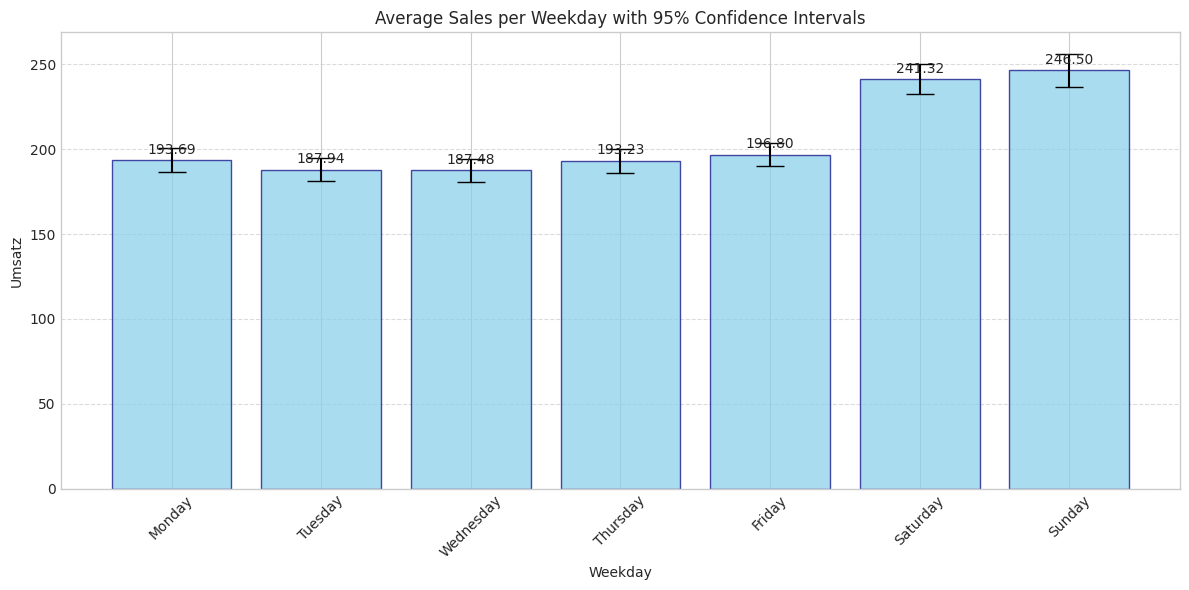

In [15]:
# Cell 7: Create bar chart with confidence intervals
plt.figure(figsize=(12, 6))

# Bar chart with error bars for confidence intervals
bars = plt.bar(sorted_avg_sales.index, sorted_avg_sales['mean'], 
               yerr=sorted_avg_sales['margin'], 
               capsize=10, 
               color='skyblue', 
               edgecolor='navy',
               alpha=0.7)

# Display values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.2f}',
             ha='center', va='bottom')

# Label the chart
plt.title('Average Sales per Weekday with 95% Confidence Intervals')
plt.xlabel('Weekday')
plt.ylabel(sales_column)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout and display
plt.tight_layout()
plt.show()

# Cell 8: Summary
print(f"Highest average sales: {sorted_avg_sales['mean'].max():.2f} on {sorted_avg_sales['mean'].idxmax()}")
print(f"Lowest average sales: {sorted_avg_sales['mean'].min():.2f} on {sorted_avg_sales['mean'].idxmin()}")